## Predicting the age of abalone using Machine Learning Algorithms
> In this notebook, we are going through a machine learning project with the goal of predicting the age of abalone(ring)

### 1. Problem definition:
> How can we predict the future sale price of a bulldozer, given its characteristics and previous examples of abalones and their characterisitcs

### 2. Data
> Data has been downloaded from Kaggle: https://www.kaggle.com/competitions/playground-series-s4e4/overview
* Train.csv is the training data set
* Test.csv is the testing data set

### 3. Evaluation
> Evaluation metric for this competition is RMSLE (Root Mean Squared Logarithmic Error) between the actual and predicted ages.

### 4. Features
> Kaggle provides a data dictionary detailing all the features of the dataset as needed.
* VIew the following for an indepth knowledge on the features: https://www.kaggle.com/competitions/playground-series-s4e4/overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df= pd.read_csv("train.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [4]:
df.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

#### As there are no empty rows, we don't need to worry about them.

In [5]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


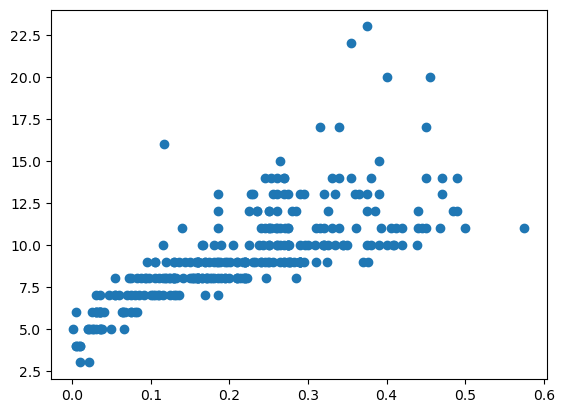

In [7]:
fig,ax= plt.subplots()
ax.scatter(df["Shell weight"][:300],df["Rings"][:300]);

In [8]:
df.Sex.dtype

dtype('O')

In [9]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
Sex,F,F,I,M,I
Length,0.55,0.63,0.16,0.595,0.555
Diameter,0.43,0.49,0.11,0.475,0.425
Height,0.15,0.145,0.025,0.15,0.13
Whole weight,0.7715,1.13,0.021,0.9145,0.782
Whole weight.1,0.3285,0.458,0.0055,0.3755,0.3695
Whole weight.2,0.1465,0.2765,0.003,0.2055,0.16
Shell weight,0.24,0.32,0.005,0.25,0.1975
Rings,11,11,6,10,9


In [10]:
df_tmp=df.copy()

In [11]:
df_tmp.head().T

,0,1,2,3,4
id,0,1,2,3,4
Sex,F,F,I,M,I
Length,0.55,0.63,0.16,0.595,0.555
Diameter,0.43,0.49,0.11,0.475,0.425
Height,0.15,0.145,0.025,0.15,0.13
Whole weight,0.7715,1.13,0.021,0.9145,0.782
Whole weight.1,0.3285,0.458,0.0055,0.3755,0.3695
Whole weight.2,0.1465,0.2765,0.003,0.2055,0.16
Shell weight,0.24,0.32,0.005,0.25,0.1975
Rings,11,11,6,10,9


In [12]:
df_tmp.head(10)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
6,6,M,0.415,0.325,0.110,0.3315,0.1655,0.0715,0.1300,9
7,7,F,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
8,8,I,0.205,0.150,0.040,0.0460,0.0145,0.0105,0.0100,4
9,9,I,0.565,0.425,0.125,0.6510,0.3795,0.1420,0.1800,8


In [13]:
len(df_tmp)

90615

In [14]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [15]:
# We can see Sex is object, hence needing to convert it into categorical data
df_tmp["Sex"]

0        F
1        F
2        I
3        M
4        I
        ..
90610    M
90611    M
90612    I
90613    I
90614    I
Name: Sex, Length: 90615, dtype: object

In [16]:
df_tmp.head().T

,0,1,2,3,4
id,0,1,2,3,4
Sex,F,F,I,M,I
Length,0.55,0.63,0.16,0.595,0.555
Diameter,0.43,0.49,0.11,0.475,0.425
Height,0.15,0.145,0.025,0.15,0.13
Whole weight,0.7715,1.13,0.021,0.9145,0.782
Whole weight.1,0.3285,0.458,0.0055,0.3755,0.3695
Whole weight.2,0.1465,0.2765,0.003,0.2055,0.16
Shell weight,0.24,0.32,0.005,0.25,0.1975
Rings,11,11,6,10,9


In [17]:
pd.api.types.is_string_dtype(df_tmp["Sex"])

True

In [18]:
# Turning all of the String values into categorical data
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              90615 non-null  int64   
 1   Sex             90615 non-null  category
 2   Length          90615 non-null  float64 
 3   Diameter        90615 non-null  float64 
 4   Height          90615 non-null  float64 
 5   Whole weight    90615 non-null  float64 
 6   Whole weight.1  90615 non-null  float64 
 7   Whole weight.2  90615 non-null  float64 
 8   Shell weight    90615 non-null  float64 
 9   Rings           90615 non-null  int64   
dtypes: category(1), float64(7), int64(2)
memory usage: 6.3 MB


In [20]:
df_tmp.Sex.cat.categories

Index(['F', 'I', 'M'], dtype='object')

In [21]:
df_tmp.Sex.cat.codes

0        0
1        0
2        1
3        2
4        1
        ..
90610    2
90611    2
90612    1
90613    1
90614    1
Length: 90615, dtype: int8

In [22]:
#Filling and turning categorical variables into numbers
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Sex


In [23]:
# Turn categorical variables into numbers and fill missing:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Adding binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        #Turn categories into numers and add+1
        df_tmp[label]=pd.Categorical(content).codes+1

In [24]:
pd.Categorical(df_tmp["Sex"]).codes+1

array([1, 1, 2, ..., 2, 2, 2], dtype=int8)

In [25]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  int8   
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
 10  Sex_is_missing  90615 non-null  bool   
dtypes: bool(1), float64(7), int64(2), int8(1)
memory usage: 6.4 MB


In [28]:
df_tmp.drop("id",axis=1,inplace=True)

In [29]:
df_tmp.head().T

,0,1,2,3,4
Sex,1,1,2,3,2
Length,0.55,0.63,0.16,0.595,0.555
Diameter,0.43,0.49,0.11,0.475,0.425
Height,0.15,0.145,0.025,0.15,0.13
Whole weight,0.7715,1.13,0.021,0.9145,0.782
Whole weight.1,0.3285,0.458,0.0055,0.3755,0.3695
Whole weight.2,0.1465,0.2765,0.003,0.2055,0.16
Shell weight,0.24,0.32,0.005,0.25,0.1975
Rings,11,11,6,10,9
Sex_is_missing,False,False,False,False,False


In [30]:
df_tmp.to_csv("train_tmp.csv",
              index=False)

In [31]:
df_tmp.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_is_missing
0,1,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,False
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,False
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False
4,2,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False


In [32]:
# Splitting into X and Y
from sklearn.model_selection import train_test_split
X= df_tmp.drop("Rings",axis=1)
y= df_tmp["Rings"]

#Splitting into training and test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [33]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((72492, 9), (18123, 9), (72492,), (18123,))

In [34]:
# Building a machine learning model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

# model.fit(X_train,y_train)
# model.score(X_test,y_test)

In [35]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((72492, 9), (72492,), (18123, 9), (18123,))

In [36]:
from sklearn.metrics import mean_squared_log_error
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_test)
    scores={"Training RMSLE":rmsle(y_train,train_preds),
           "Validating RMSLE":rmsle(y_test,val_preds)}
    return scores;

In [37]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
show_scores(model)

{'Training RMSLE': 0.05948160061506711,
 'Validating RMSLE': 0.15393151047060755}

In [35]:
#### Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
grid= {"n_estimators": [10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)

X= df_tmp.drop("Rings",axis=1)
y= df_tmp["Rings"]

#Splitting into training and test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

rf= RandomForestRegressor(n_jobs=-1)

rs_rf = RandomizedSearchCV(estimator = rf,
                           param_distributions = grid,
                           n_iter = 10,
                           cv = 3,
                           verbose=2)
rs_rf.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [ ]:
rs_rf.best_params_

In [36]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [132]:
from sklearn.model_selection import GridSearchCV

grid_2={'n_estimators': [800,1000,1200],
 'max_depth': [None,5],
 'max_features': ['sqrt'],
 'min_samples_split': [4],
 'min_samples_leaf': [4]}

np.random.seed(42)

X= df_tmp.drop("Rings",axis=1)
y= df_tmp["Rings"]

#Splitting into training and test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

rf= RandomForestRegressor(n_jobs=-1)

rs_rf = GridSearchCV(estimator = rf,
                           param_grid = grid_2,
                           cv =5,
                           verbose=2)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=  34.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=  37.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=  39.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=  37.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=  44.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=  55.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=  49.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4,

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 5], 'max_features': ['sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [4],
                         'n_estimators': [800, 1000, 1200]},
             verbose=2)

In [90]:
X

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_is_missing
0,1,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,False
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,False
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,False
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,False
4,2,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,False
...,...,...,...,...,...,...,...,...,...
90610,3,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,False
90611,3,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,False
90612,2,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,False
90613,2,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,False


In [37]:
rs_rf.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [136]:
show_scores(rs_rf)

{'Training RMSLE': 0.10711634968556476,
 'Validating RMSLE': 0.15230364723879455}

### Implementing cat-boost

In [39]:
import catboost as cb

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((72492, 9), (18123, 9), (72492,), (18123,))

In [41]:
train_dataset=cb.Pool(X_train,y_train)
test_dataset=cb.Pool(X_test,y_test)

In [42]:
model=cb.CatBoostRegressor(loss_function='RMSE')

In [80]:
model.fit(X, y, verbose=100)

Learning rate set to 0.083448
0:	learn: 3.0419275	total: 15.5ms	remaining: 15.5s
100:	learn: 1.8772390	total: 889ms	remaining: 7.91s
200:	learn: 1.8359739	total: 1.85s	remaining: 7.36s
300:	learn: 1.8091545	total: 2.75s	remaining: 6.38s
400:	learn: 1.7897781	total: 3.61s	remaining: 5.39s
500:	learn: 1.7727002	total: 4.57s	remaining: 4.55s
600:	learn: 1.7580070	total: 5.54s	remaining: 3.67s
700:	learn: 1.7455246	total: 6.45s	remaining: 2.75s
800:	learn: 1.7341530	total: 7.35s	remaining: 1.82s
900:	learn: 1.7232795	total: 8.38s	remaining: 921ms
999:	learn: 1.7130724	total: 9.3s	remaining: 0us


In [43]:
grid= {'iterations':[100,150,200],
       'learning_rate':[0.03,0.1],
       'depth':[2,4,6,8],
       'l2_leaf_reg':[0.2,0.5,1,3]}
model.grid_search(grid,train_dataset)

0:	learn: 9.9142287	test: 9.8979080	best: 9.8979080 (0)	total: 151ms	remaining: 14.9s
1:	learn: 9.6362739	test: 9.6201616	best: 9.6201616 (1)	total: 154ms	remaining: 7.55s
2:	learn: 9.3664267	test: 9.3505115	best: 9.3505115 (2)	total: 157ms	remaining: 5.07s
3:	learn: 9.1049098	test: 9.0895299	best: 9.0895299 (3)	total: 160ms	remaining: 3.84s
4:	learn: 8.8530119	test: 8.8379588	best: 8.8379588 (4)	total: 163ms	remaining: 3.1s
5:	learn: 8.6091066	test: 8.5940381	best: 8.5940381 (5)	total: 166ms	remaining: 2.6s
6:	learn: 8.3724800	test: 8.3576715	best: 8.3576715 (6)	total: 169ms	remaining: 2.24s
7:	learn: 8.1434856	test: 8.1287144	best: 8.1287144 (7)	total: 171ms	remaining: 1.97s
8:	learn: 7.9214888	test: 7.9067013	best: 7.9067013 (8)	total: 175ms	remaining: 1.76s
9:	learn: 7.7087241	test: 7.6940308	best: 7.6940308 (9)	total: 178ms	remaining: 1.6s
10:	learn: 7.5030779	test: 7.4884953	best: 7.4884953 (10)	total: 183ms	remaining: 1.48s
11:	learn: 7.3037168	test: 7.2895218	best: 7.2895218 (1

KeyboardInterrupt: 

In [46]:
pred=model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error,r2_score

In [51]:
rmse= (np.sqrt(mean_squared_error(y_test,pred)))
print('RMSE: {:.5f}'.format(rmse))

RMSE: 1.88249


In [47]:
show_scores(model)

{'Training RMSLE': 0.14155522380038338,
 'Validating RMSLE': 0.14841799579729906}

In [54]:
print(model.get_best_score())

{'learn': {'RMSE': 1.77437562898816}}


In [61]:
test_df= pd.read_csv("test.csv",low_memory=False)

In [62]:
test_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [63]:
df_tmp=test_df.copy()

In [67]:
df_tmp.drop("id",axis=1,inplace=True)

In [68]:
df_tmp

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...
60406,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [69]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Sex


In [70]:
#Converting it all into categorical data which will then be handled by Catboost
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [71]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             60411 non-null  category
 1   Length          60411 non-null  float64 
 2   Diameter        60411 non-null  float64 
 3   Height          60411 non-null  float64 
 4   Whole weight    60411 non-null  float64 
 5   Whole weight.1  60411 non-null  float64 
 6   Whole weight.2  60411 non-null  float64 
 7   Shell weight    60411 non-null  float64 
dtypes: category(1), float64(7)
memory usage: 3.3 MB


In [72]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Sex


In [73]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes+1

In [74]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  int8   
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
 8   Sex_is_missing  60411 non-null  bool   
dtypes: bool(1), float64(7), int8(1)
memory usage: 3.3 MB


In [81]:
model.predict(df_tmp)

array([ 9.72960078,  9.62302949, 10.2422676 , ..., 12.85531453,
       13.91471953,  8.45724163])

In [82]:
len(model.predict(df_tmp))

60411

In [83]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  int8   
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
 8   Sex_is_missing  60411 non-null  bool   
dtypes: bool(1), float64(7), int8(1)
memory usage: 3.3 MB


In [84]:
test_preds=model.predict(df_tmp)

In [85]:
# Converting Float Values to Integer
test_preds = np.round(test_preds).astype(int)

In [86]:
df_preds=pd.DataFrame()
df_preds["id"]=test_df["id"]
df_preds["Rings"]=test_preds
df_preds

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,11
4,90619,8
...,...,...
60406,151021,6
60407,151022,10
60408,151023,13
60409,151024,14


In [87]:
# df_preds.to_csv("Cat-Boost_Result-2.csv",index=False)

In [48]:
# Saving the model
from joblib import dump,load
dump(model, filename="CatBoost-Model-1.joblib")

['CatBoost-Model-1.joblib']

In [88]:
df_preds.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,11
4,90619,8


### Using Xg-Boost

In [50]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 10, seed =42)
xgb_r.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
#XG-Boost Model
show_scores(xgb_r)

{'Training RMSLE': 0.150128161054654, 'Validating RMSLE': 0.15123356505647575}

In [53]:
#Cat-Boost Model:
show_scores(model)

{'Training RMSLE': 0.14155522380038338,
 'Validating RMSLE': 0.14841799579729906}

In [76]:
test_preds=model.predict(df_tmp)

In [77]:
test_preds = np.round(test_preds).astype(int)

In [78]:
df_preds=pd.DataFrame()
df_preds["id"]=test_df["id"]
df_preds["Rings"]=test_preds
df_preds

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,8
...,...,...
60406,151021,6
60407,151022,10
60408,151023,13
60409,151024,14


In [79]:
# df_preds.to_csv("Cat-Boost_Result-1.csv",index=False)